In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_complete = pd.merge(clinical_trial_df, mouse_drug_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
trial_data_complete.head()
#trial_data_complete.isnull().values.any()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_respone_data = trial_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]

drug_timepoint_grp = tumor_respone_data.groupby(["Drug","Timepoint"])

drug_mean = drug_timepoint_grp["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_response_treatment_df = pd.DataFrame({"Tumor Volume (mm3)" : drug_mean}).reset_index()


tumor_response_treatment_df.head(30)

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_standard_error = drug_timepoint_grp["Tumor Volume (mm3)"].sem()
drug_standard_error.head()

# Convert to DataFrame
tumor_response_sterr_df = pd.DataFrame({"Tumor Volume (mm3)" : drug_standard_error}).reset_index()
# Preview DataFrame
tumor_response_sterr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
d2 = tumor_response_treatment_df
d2.head()
# Preview that Reformatting worked


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Generate the Plot (with Error Bars)

# Save the Figure
x_axis = tumor_response_treatment_df["Drug"]
type(x_axis)
means = tumor_response_treatment_df["Tumor Volume (mm3)"]
sem = tumor_response_sterr_df["Tumor Volume (mm3)"]


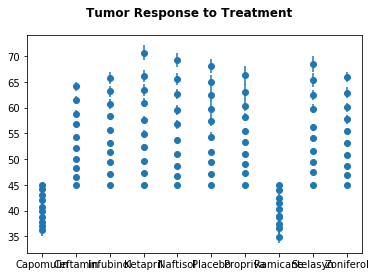

In [7]:
# Show the Figure
fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment",
             fontsize=12, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

#ax.set_xlim(-0.5, 1.5)
#ax.set_ylim(64, 73)

#ax.set_xticklabels(tick_labels)
#ax.set_xticks([0, 1])

#ax.set_ylabel("Height (Inches)")


plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [11]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [14]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()